# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os 
import scipy.stats as st

from datetime import date
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as its being processed (with the city number and city name).


In [3]:
#set query url and unit measuremnt type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set lists to hold df values
name = []
country = []
lat = []
lon = []
max_temp = []
hum = []
clouds = []
wind_speed = []
date = []

#set record and set count
record = 0
set_count = 1

#format print log
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for index, city in enumerate(cities, start = 1): 
    response = requests.get(query_url + city).json()
    #pprint(response)
    
    try:
        name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])       
        city_name = response["name"]
        
        if record > 49:
            record = 0
            set_count = set_count + 1
        else:
            record = record + 1
            
        print(f"Processing Record {record} of Set {set_count} | {city_name}")
        
        time.sleep(1)
        
    except:
        print(f"City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Kamenka
Processing Record 2 of Set 1 | Jamestown
Processing Record 3 of Set 1 | Saint-Philippe
Processing Record 4 of Set 1 | Kavieng
City not found. Skipping...
Processing Record 5 of Set 1 | Tautira
Processing Record 6 of Set 1 | Nesna
City not found. Skipping...
Processing Record 7 of Set 1 | Marabu
Processing Record 8 of Set 1 | Mataura
Processing Record 9 of Set 1 | Caraquet
Processing Record 10 of Set 1 | Orleans
Processing Record 11 of Set 1 | Butaritari
Processing Record 12 of Set 1 | Ushuaia
Processing Record 13 of Set 1 | Cabo San Lucas
Processing Record 14 of Set 1 | Tuatapere
Processing Record 15 of Set 1 | Chokurdakh
Processing Record 16 of Set 1 | Kabare
Processing Record 17 of Set 1 | Cockburn Town
Processing Record 18 of Set 1 | Avarua
Processing Record 19 of Set 1 | Rikitea
Processing Record 20 of Set 1 | Dunblane
Processing Record 21 of Set 1 | Carutapera
Processing Record 22 of Se

Processing Record 34 of Set 4 | Dingle
Processing Record 35 of Set 4 | Nizhniy Kuranakh
Processing Record 36 of Set 4 | Kentau
Processing Record 37 of Set 4 | Sitka
Processing Record 38 of Set 4 | Dehlorān
Processing Record 39 of Set 4 | Constitución
Processing Record 40 of Set 4 | Yellowknife
Processing Record 41 of Set 4 | Palmer
Processing Record 42 of Set 4 | Deputatsky
Processing Record 43 of Set 4 | Pacific Grove
Processing Record 44 of Set 4 | Saint Paul Harbor
City not found. Skipping...
Processing Record 45 of Set 4 | Quzhou
City not found. Skipping...
Processing Record 46 of Set 4 | Sandnessjøen
Processing Record 47 of Set 4 | Havelock
Processing Record 48 of Set 4 | Emerald
Processing Record 49 of Set 4 | Vila Franca do Campo
Processing Record 50 of Set 4 | Pisco
Processing Record 0 of Set 5 | Talnakh
Processing Record 1 of Set 5 | Bredasdorp
Processing Record 2 of Set 5 | Umm Kaddadah
Processing Record 3 of Set 5 | Madimba
Processing Record 4 of Set 5 | Matara
Processing Re

Processing Record 18 of Set 8 | Davila
Processing Record 19 of Set 8 | Zhigansk
Processing Record 20 of Set 8 | San Cristobal
Processing Record 21 of Set 8 | Kyzyl-Mazhalyk
Processing Record 22 of Set 8 | Wagga Wagga
Processing Record 23 of Set 8 | Colares
Processing Record 24 of Set 8 | Monte Patria
Processing Record 25 of Set 8 | Flin Flon
Processing Record 26 of Set 8 | Kuito
Processing Record 27 of Set 8 | Galle
Processing Record 28 of Set 8 | Quartucciu
Processing Record 29 of Set 8 | San Borja
City not found. Skipping...
Processing Record 30 of Set 8 | Olafsvik
Processing Record 31 of Set 8 | Ulagan
Processing Record 32 of Set 8 | Tiznit Province
Processing Record 33 of Set 8 | Kirakira
Processing Record 34 of Set 8 | Garmsār
Processing Record 35 of Set 8 | Warrington
Processing Record 36 of Set 8 | Sundumbili
Processing Record 37 of Set 8 | Sola
Processing Record 38 of Set 8 | Borgo San Dalmazzo
Processing Record 39 of Set 8 | Spencer
City not found. Skipping...
Processing Recor

Processing Record 1 of Set 12 | Ambunti
Processing Record 2 of Set 12 | Tayu
Processing Record 3 of Set 12 | Ocampo
City not found. Skipping...
Processing Record 4 of Set 12 | Maceió
Processing Record 5 of Set 12 | San Jerónimo
Processing Record 6 of Set 12 | Gijang
Processing Record 7 of Set 12 | Funadhoo
Processing Record 8 of Set 12 | Charter Township of Clinton
Processing Record 9 of Set 12 | Yuncheng
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [4]:
#create df of city weather 
city_weather = pd.DataFrame({"City": name,
                             "Lat": lat,
                             "Lng": lon,
                             "Max Temp": max_temp,
                             "Humidity": hum,
                             "Cloudiness": clouds,
                             "Wind Speed": wind_speed,
                             "Country": country,
                             "Date": date})

#set output file and write df to a csv
output_file = os.path.join("..", "Output_Data", "cities.csv")

city_weather.to_csv(output_file, index=True, header=True)
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.32,42.77,20.35,98,53,7.00,RU,1609717264
1,Jamestown,42.10,-79.24,35.01,96,90,8.05,US,1609717266
2,Saint-Philippe,-21.36,55.77,75.20,73,40,10.29,RE,1609717267
3,Kavieng,-2.57,150.80,85.46,70,97,16.58,PG,1609717268
4,Tautira,-17.73,-149.15,87.80,55,20,17.22,PF,1609717269


In [5]:
#calculate descriptive statistics 
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.783386,23.580281,48.016228,76.700000,56.000000,7.819509,1.609718e+09
std,32.978051,90.429312,32.154776,17.858047,39.010251,6.113525,2.127528e+02
min,-54.800000,-179.170000,-43.600000,7.000000,0.000000,0.180000,1.609717e+09
25%,-6.955000,-55.905000,30.200000,70.000000,18.000000,3.360000,1.609717e+09
50%,25.170000,27.460000,59.020000,81.500000,75.000000,6.140000,1.609718e+09
75%,48.077500,105.060000,74.995000,88.750000,92.000000,10.290000,1.609718e+09
max,78.220000,179.320000,94.460000,100.000000,100.000000,35.990000,1.609718e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_check = city_weather.loc[city_weather["Humidity"] <= 100]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.32,42.77,20.35,98,53,7.00,RU,1609717264
1,Jamestown,42.10,-79.24,35.01,96,90,8.05,US,1609717266
2,Saint-Philippe,-21.36,55.77,75.20,73,40,10.29,RE,1609717267
3,Kavieng,-2.57,150.80,85.46,70,97,16.58,PG,1609717268
4,Tautira,-17.73,-149.15,87.80,55,20,17.22,PF,1609717269
...,...,...,...,...,...,...,...,...,...
565,San Jerónimo,-11.95,-75.28,52.65,71,35,3.31,PE,1609717966
566,Gijang,35.24,129.21,24.80,62,0,1.12,KR,1609717701
567,Funadhoo,6.15,73.27,81.52,72,56,7.45,MV,1609717968
568,Charter Township of Clinton,42.59,-82.92,36.00,100,90,3.83,US,1609717969


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

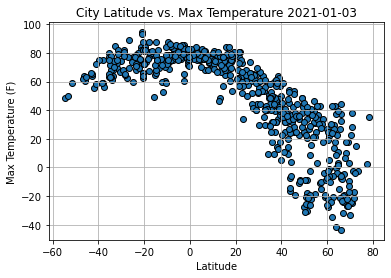

In [11]:
#set variable for current date to print 
today = date.today()

#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Max Temp"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")

#save figure as png  
plt.savefig("Fig1.png", format='png')

plt.show()

This plot shows the correlation between the max temperature of cities around the world and their latitudinal location.  With 0 on the x-axis being the equator, this plot shows that the maximum temperture at locations around the equator are the warmest, and that there is a moderate negative correlation between latitude and temperature. 

## Latitude vs. Humidity Plot

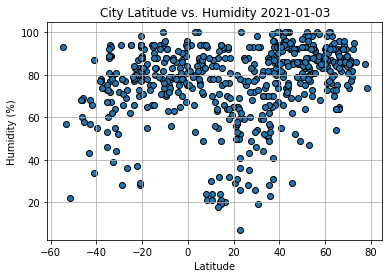

In [12]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Humidity"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

#save figure as png  
plt.savefig("Fig2.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of the city and their humidity level for the current day. Generally, it appears to show no real correlation between location and humidity levels.  

## Latitude vs. Cloudiness Plot

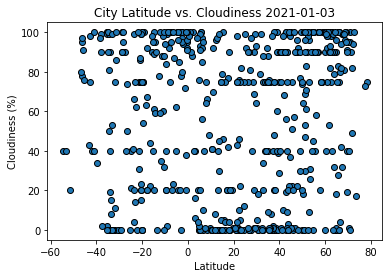

In [13]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Cloudiness"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

#save figure as png  
plt.savefig("Fig3.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and the cloudiness level for the current day.  Generally, it appears to show no real correlation beteen latitude and cloudiness levels. 

## Latitude vs. Wind Speed Plot

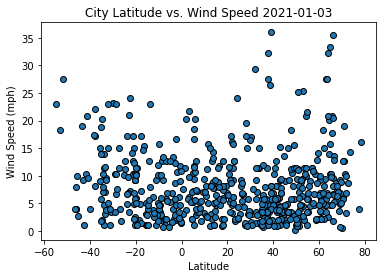

In [14]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Wind Speed"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")

#save figure as png  
plt.savefig("Fig4.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and their current wind speed.  Generally, there appears to be no real correlation between location and wind speed. 

## Linear Regression

In [15]:
north = city_weather.loc[city_weather["Lat"] >= 0]
south = city_weather.loc[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8286238384016238


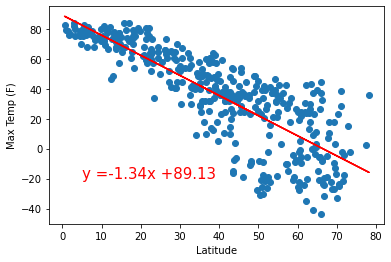

In [16]:
x = north["Lat"]
y = north["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(5, -20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4885194078906606


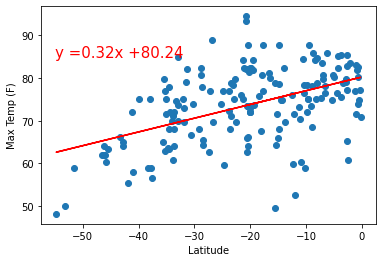

In [17]:
x = south["Lat"]
y = south["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 85), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.34706765718302063


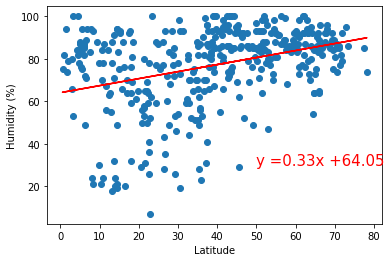

In [18]:
x = north["Lat"]
y = north["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(50, 30), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3664190464405322


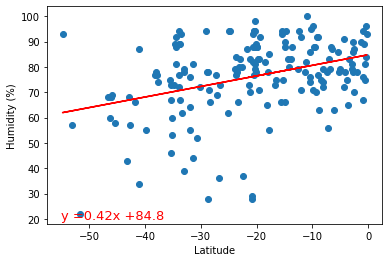

In [19]:
x = south["Lat"]
y = south["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2948037472574455


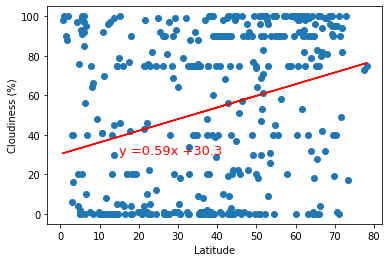

In [20]:
x = north["Lat"]
y = north["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(15, 30), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17798788818196432


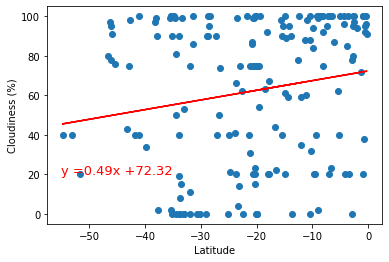

In [21]:
x = south["Lat"]
y = south["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09967977879187695


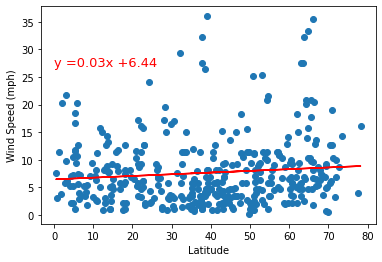

In [22]:
x = north["Lat"]
y = north["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(0, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.32197501188279865


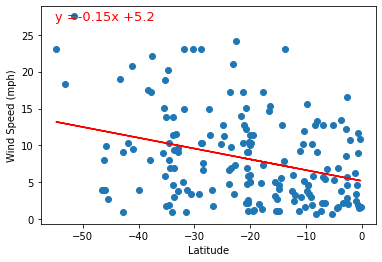

In [23]:
x = south["Lat"]
y = south["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()